# Exercise 3.1
### Import relevant modules from thinkstats

In [25]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np
import sys
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read NSFG respondent data

In [4]:
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    return df

In [6]:
resp = ReadFemResp()

###Create PMF for number of kids per household (actual and observed)

In [13]:
numkids_pmf = thinkstats2.Pmf(resp.numkdhh, label = 'actual')

In [8]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x,p in pmf.Items():
        new_pmf.Mult(x,x)
    new_pmf.Normalize()
    return new_pmf

In [10]:
biased_pmf = BiasPmf(numkids_pmf, label = 'observed')

###Bar Plot of PMFs (actual and observed)

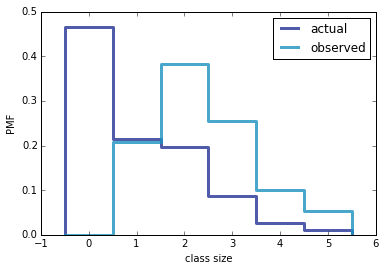

In [26]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([numkids_pmf, biased_pmf])
thinkplot.Show(xlabel = 'class size', ylabel = 'PMF')

###Mean number of kids per household (actual and observed)

In [30]:
print "Actual number of kids per household: " + str(round(numkids_pmf.Mean(), 3))
print "Observed (biased) number of kids per household: " + str(round(biased_pmf.Mean(), 3))

Actual number of kids per household: 1.024
Observed (biased) number of kids per household: 2.404
